<center><h1 style="color:red;">USL</h1></center>

## FLOW

1. load dataset
2. do analysis : 
    * shape , size ,info 
    * split categorical and numerical datas
    * do .describe() for numerical columns 
    * do univariate analysis to numerical columns 
    * do value counts and count plot to categorical columns 
    * missing values 
    * scaling 
    * check for correlation , covariance for numerical data. if there is corr ,cov then only we can do PCA
    * PCA:
        1. do the steps and do scree plot
        2. work further with this PCA dataset (dimensionality reduction)
    * Build the clusters for PCA data
        1. KMeans or Hirarchical 
        2. Put Elbow plot , silhoutte score , dendrogram as requried
        3. find cophenet correlation coefficient for hierarchical 
    * Final clustering using optimal number of K
    * seperate the clusters are do .describe for all clusters data
    * scatter plot for datas with hue = labels 
    * Build a classification model with the PCA data along with label columns taking label column as target
    * classification report for the classification model
    * Write the inference here

## BASIC ANALYSIS

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,PowerTransformer

from sklearn.model_selection import train_test_split,GridSearchCV
#SLC
#stats models
import statsmodels.api as sm

#sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#metrices
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import warnings 
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [29]:
df = df.drop('id',axis=1)

* Id column creates noise, so dropped.

In [30]:
print(df.nunique())

diagnosis              2
radius_mean          456
texture_mean         479
perimeter_mean       522
area_mean            539
smoothness_mean      474
compactness_mean     537
concavity_mean       537
points_mean          542
symmetry_mean        432
dimension_mean       499
radius_se            540
texture_se           519
perimeter_se         533
area_se              528
smoothness_se        547
compactness_se       541
concavity_se         533
points_se            507
symmetry_se          498
dimension_se         545
radius_worst         457
texture_worst        511
perimeter_worst      514
area_worst           544
smoothness_worst     411
compactness_worst    529
concavity_worst      539
points_worst         492
symmetry_worst       500
dimension_worst      535
dtype: int64


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [32]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [33]:
df = df.drop('diagnosis',axis=1)

* Dropping diagnosis column, it also creates noise.

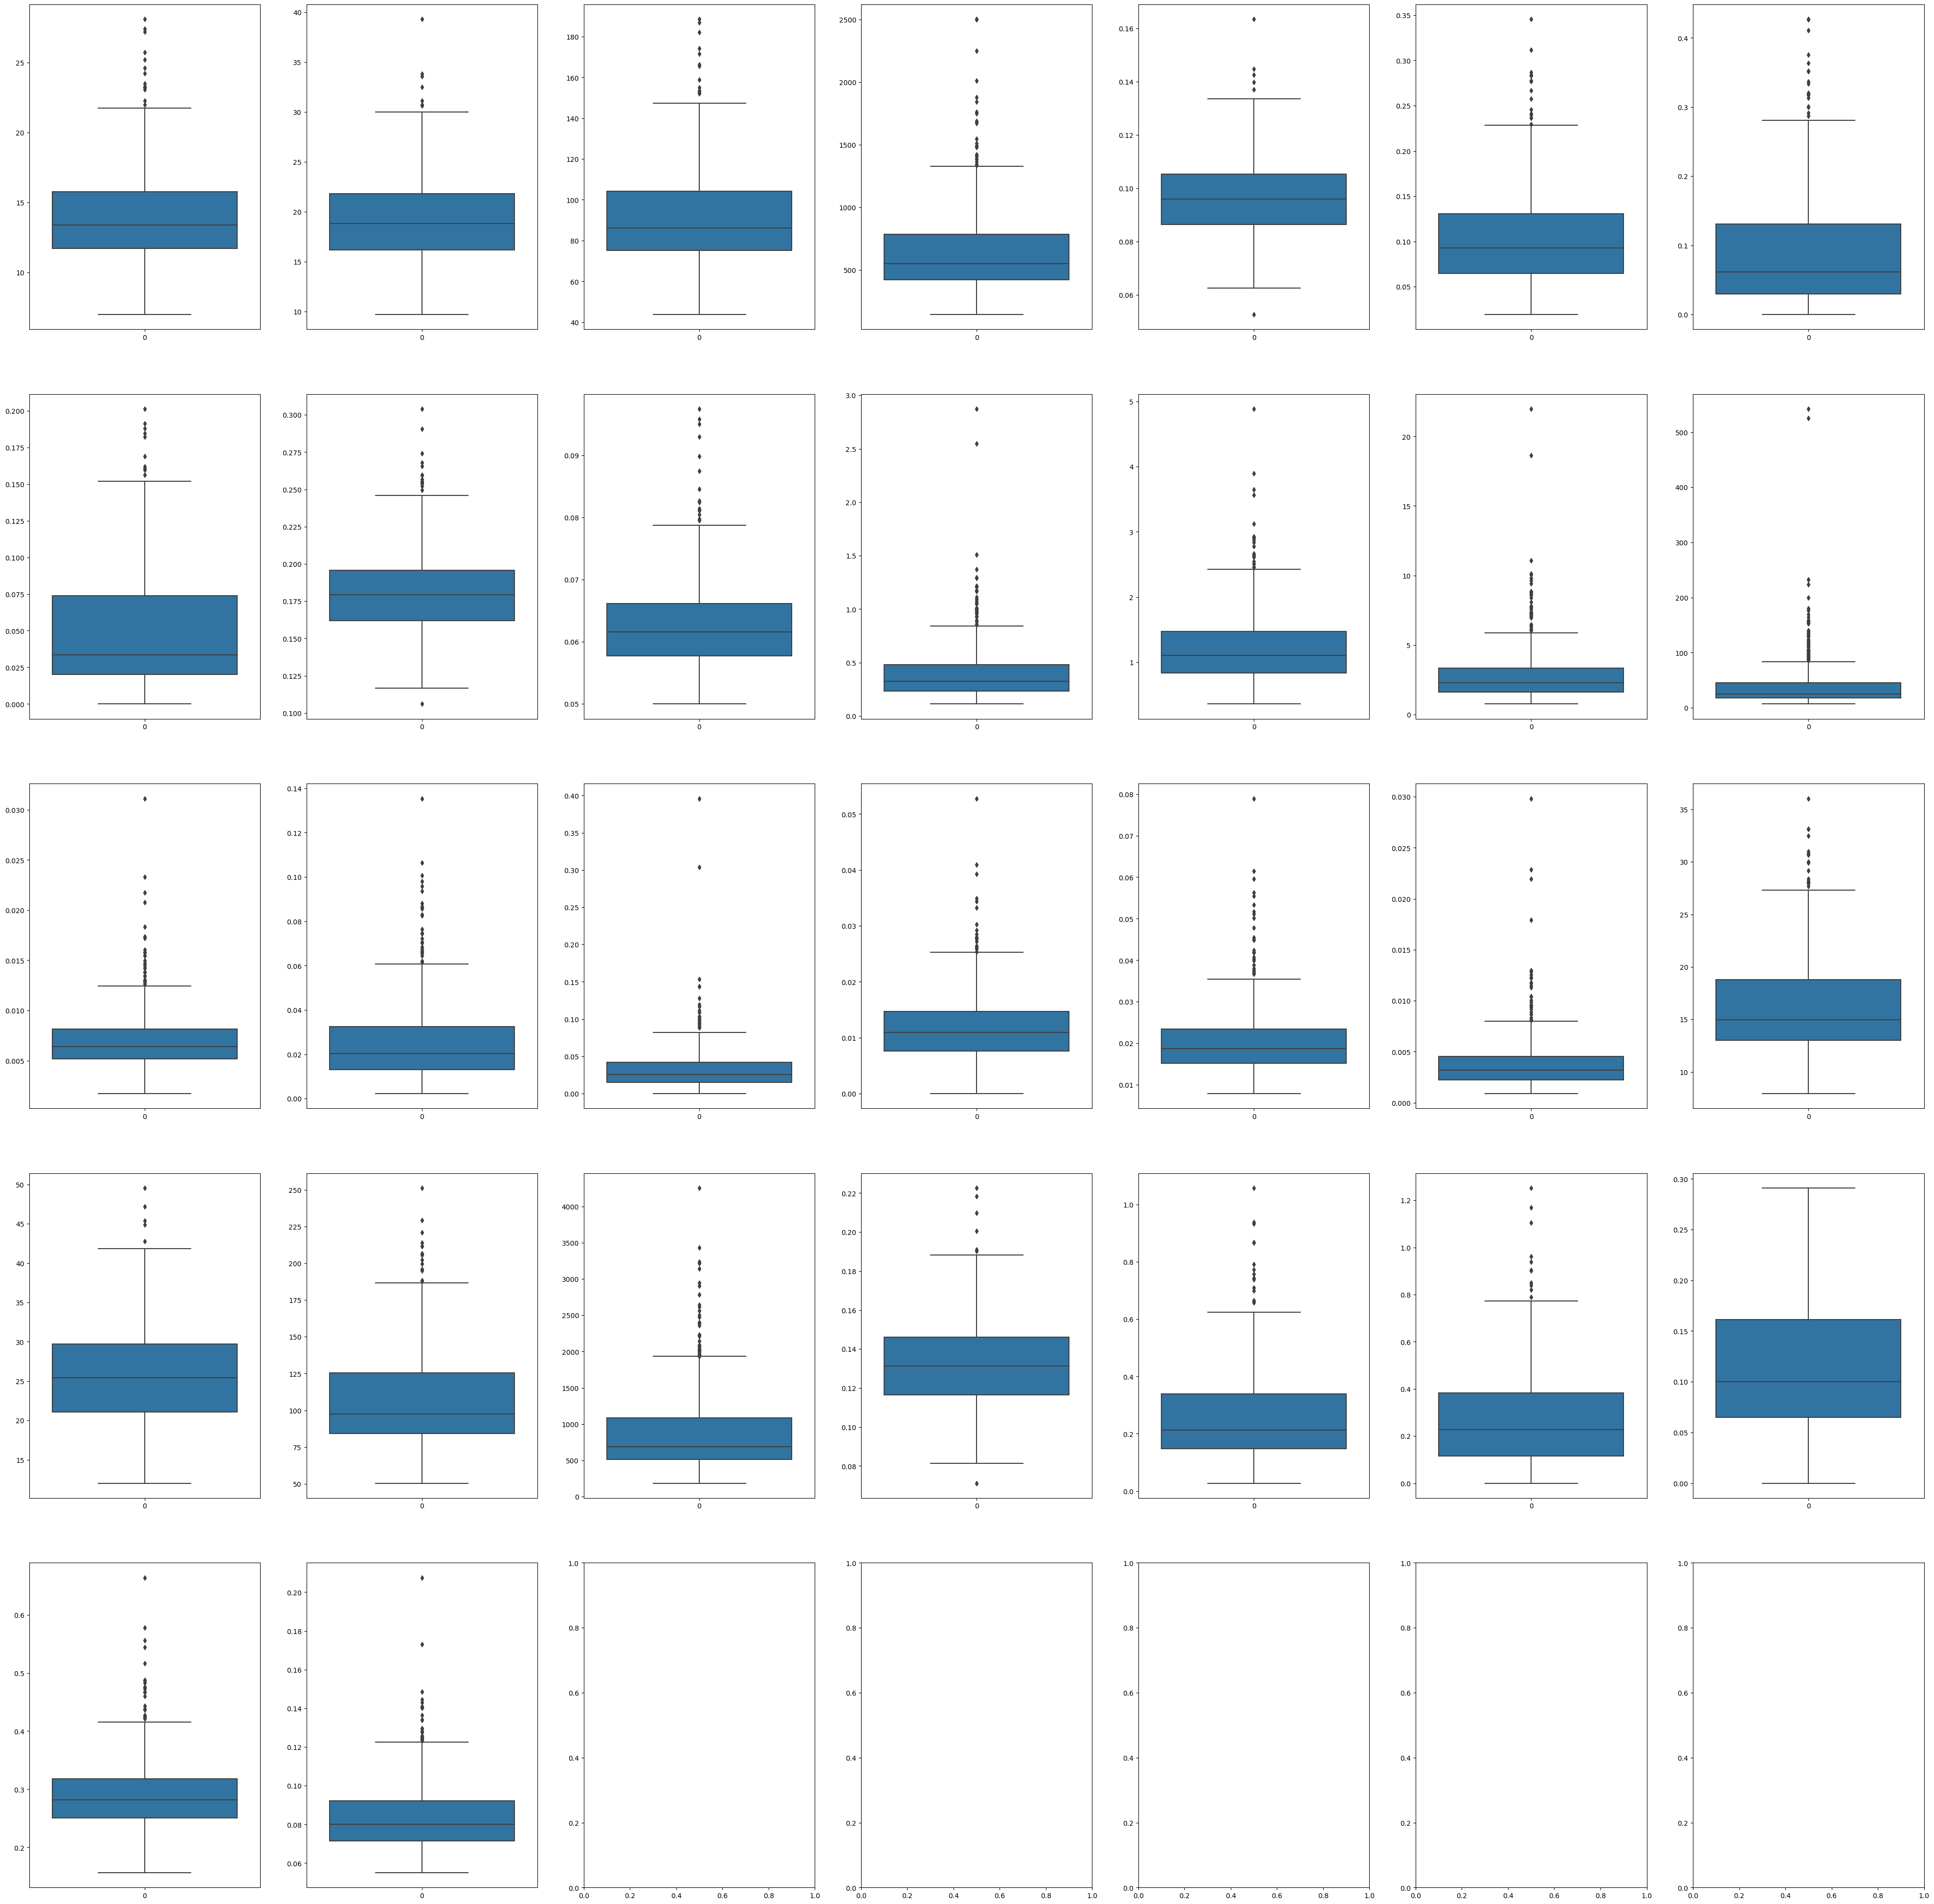

In [34]:
fig,ax = plt.subplots(5,7,figsize=(50,50))
for i,v in zip(df.columns,ax.flatten()):
    sns.boxplot(df[i],ax = v)
plt.show()

In [35]:
#iqr
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr
df[((df<ll)|(df>ul)).any(axis=1)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
6,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
18,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,23.68,29.43,158.80,1696.0,0.1347,0.3391,0.49320,0.19230,0.3294,0.09469
21,11.69,24.44,76.37,406.4,0.12360,0.15520,0.04515,0.04531,0.2131,0.07405,...,12.98,32.19,86.12,487.7,0.1768,0.3251,0.13950,0.13080,0.2803,0.09970
32,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,21.57,28.87,143.60,1437.0,0.1207,0.4785,0.51650,0.19960,0.2301,0.12240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750
555,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.70530,0.24220,0.3828,0.10070
558,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,0.06669,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488


In [36]:
df.skew()

radius_mean          0.942380
texture_mean         0.650450
perimeter_mean       0.990650
area_mean            1.645732
smoothness_mean      0.456324
compactness_mean     1.190123
concavity_mean       1.401180
points_mean          1.171180
symmetry_mean        0.725609
dimension_mean       1.304489
radius_se            3.088612
texture_se           1.646444
perimeter_se         3.443615
area_se              5.447186
smoothness_se        2.314450
compactness_se       1.902221
concavity_se         5.110463
points_se            1.444678
symmetry_se          2.195133
dimension_se         3.923969
radius_worst         1.103115
texture_worst        0.498321
perimeter_worst      1.128164
area_worst           1.859373
smoothness_worst     0.415426
compactness_worst    1.473555
concavity_worst      1.150237
points_worst         0.492616
symmetry_worst       1.433928
dimension_worst      1.662579
dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_mean        569 non-null    float64
 1   texture_mean       569 non-null    float64
 2   perimeter_mean     569 non-null    float64
 3   area_mean          569 non-null    float64
 4   smoothness_mean    569 non-null    float64
 5   compactness_mean   569 non-null    float64
 6   concavity_mean     569 non-null    float64
 7   points_mean        569 non-null    float64
 8   symmetry_mean      569 non-null    float64
 9   dimension_mean     569 non-null    float64
 10  radius_se          569 non-null    float64
 11  texture_se         569 non-null    float64
 12  perimeter_se       569 non-null    float64
 13  area_se            569 non-null    float64
 14  smoothness_se      569 non-null    float64
 15  compactness_se     569 non-null    float64
 16  concavity_se       569 non

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [39]:
col = df.columns.to_list()

In [40]:
df[col]=sc.fit_transform(df[col])

In [41]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


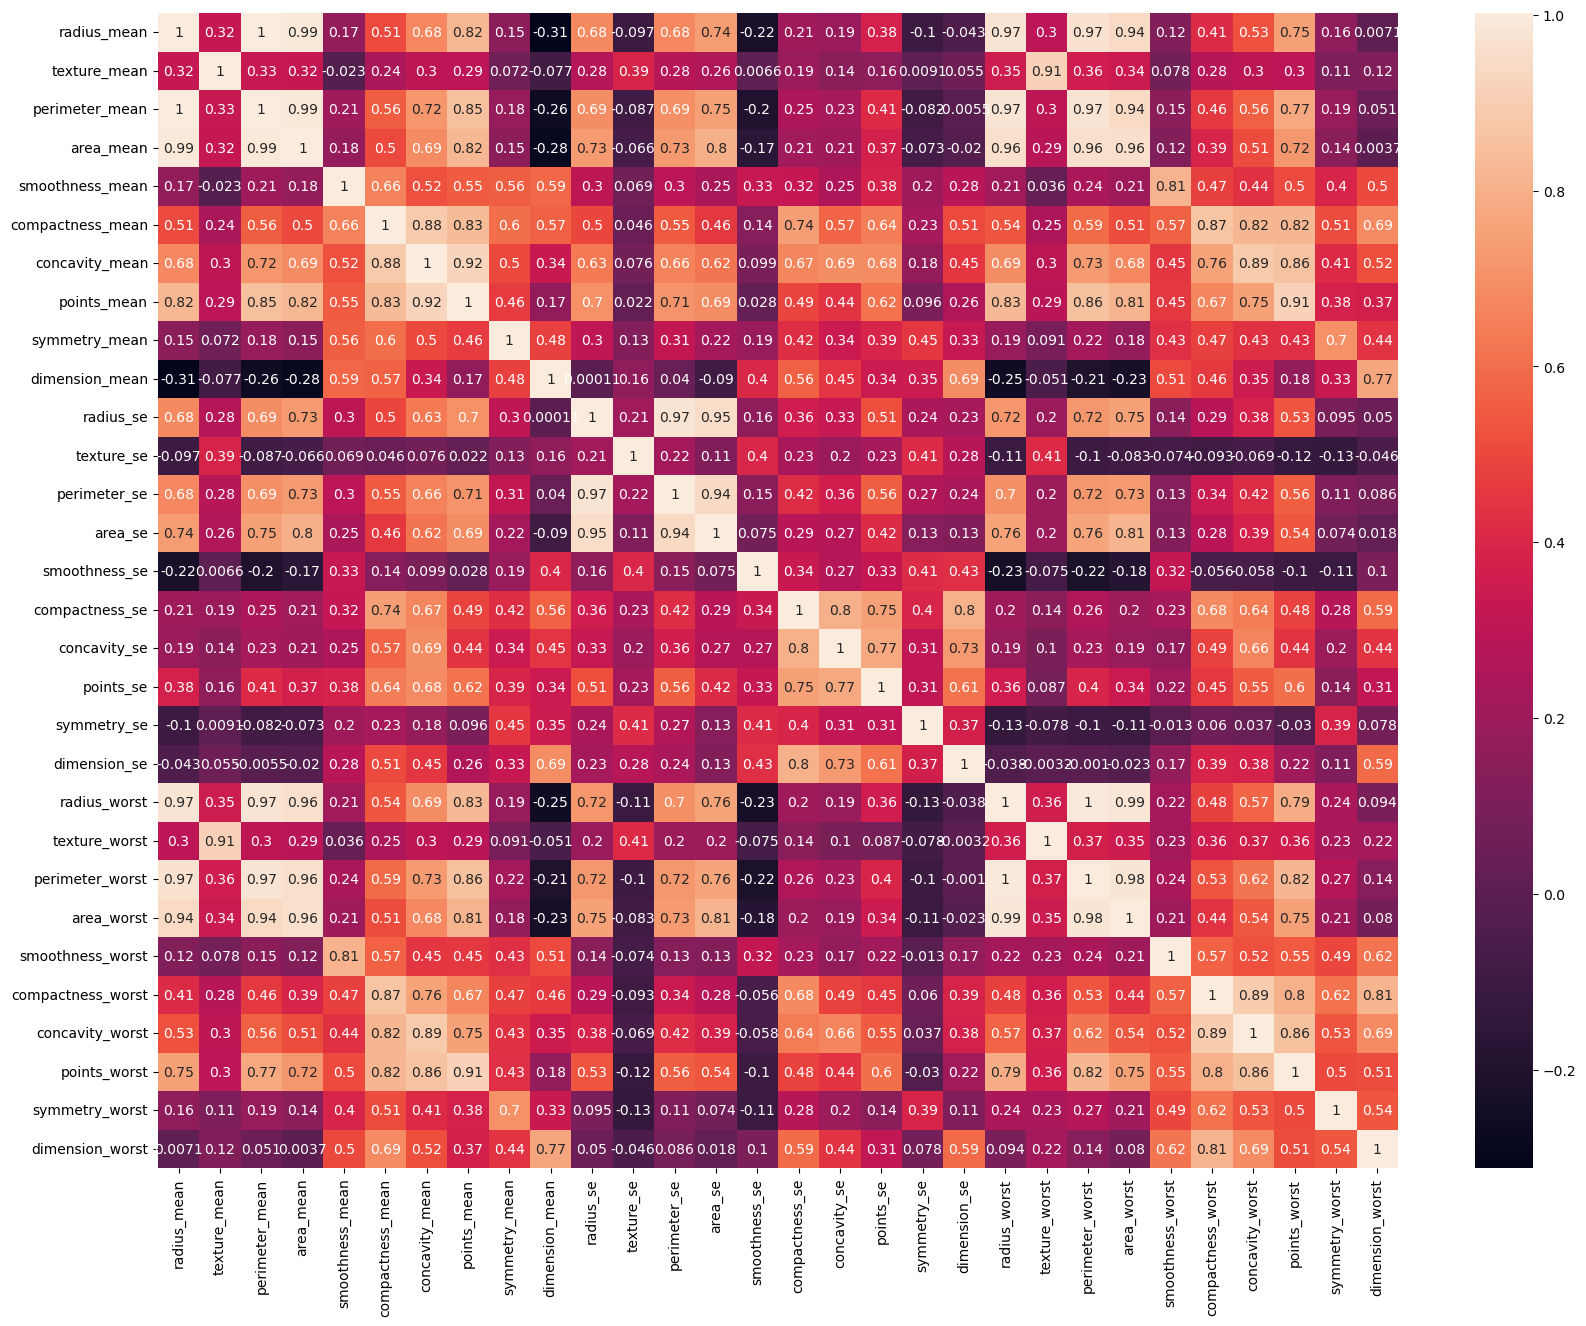

In [42]:
plt.figure(figsize=(20,15))
dfv = df.cov()
sns.heatmap(dfv,annot=True)
plt.show()

# PCA

In [44]:
cov_mat = np.cov(df.T)
eig_val, eig_vect = np.linalg.eig(cov_mat)
eig_val = list(eig_val)
eig_val.sort(reverse=True)

per = []
for i in eig_val:
    a = (i/sum(eig_val))*100
    per.append(a)
    
cum_var = np.cumsum(per)

len(cum_var[cum_var<99.2])

17

In [14]:
df.cov()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
radius_mean,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,...,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture_mean,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,...,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter_mean,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,...,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
area_mean,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,...,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
smoothness_mean,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,...,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
compactness_mean,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,...,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
concavity_mean,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,...,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
points_mean,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,...,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
symmetry_mean,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,...,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
dimension_mean,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,...,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


In [24]:
cov_mat = np.cov(df.T)
cov_mat

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [25]:
e_val,e_vect = np.linalg.eig(cov_mat)

In [17]:
e_val

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [18]:
e_val = list(e_val)
e_val

[13.304990794374556,
 5.70137460372614,
 2.8229101550062277,
 1.9841275177302018,
 1.651633242330124,
 1.2094822398029745,
 0.6764088817009042,
 0.4774562546895082,
 0.4176287821078169,
 0.35131087488173296,
 0.2944331534911647,
 0.261621161366121,
 0.24178242132831393,
 0.15728614921759343,
 0.09430069560105563,
 0.08000340447737693,
 0.05950361353043195,
 0.05271142221014778,
 0.04956470021298162,
 0.00013327905666428382,
 0.0007501214127185053,
 0.0015921360011978752,
 0.006912612579184234,
 0.00819203711760692,
 0.015508527134418599,
 0.01808679398430558,
 0.02438369135459118,
 0.02748771133890461,
 0.031214260553066014,
 0.030025663090428707]

In [19]:
e_val.sort(reverse=True)
print(e_val)

[13.304990794374556, 5.70137460372614, 2.8229101550062277, 1.9841275177302018, 1.651633242330124, 1.2094822398029745, 0.6764088817009042, 0.4774562546895082, 0.4176287821078169, 0.35131087488173296, 0.2944331534911647, 0.261621161366121, 0.24178242132831393, 0.15728614921759343, 0.09430069560105563, 0.08000340447737693, 0.05950361353043195, 0.05271142221014778, 0.04956470021298162, 0.031214260553066014, 0.030025663090428707, 0.02748771133890461, 0.02438369135459118, 0.01808679398430558, 0.015508527134418599, 0.00819203711760692, 0.006912612579184234, 0.0015921360011978752, 0.0007501214127185053, 0.00013327905666428382]


In [20]:
per = []

for i in e_val:
    a = (i/sum(e_val))*100
    per.append(a)
per

[44.27202560752634,
 18.971182044033082,
 9.393163257431384,
 6.60213491547015,
 5.495768492346282,
 4.024522039883359,
 2.2507337129825045,
 1.5887238000213275,
 1.3896493745591094,
 1.1689781894131475,
 0.9797189875980171,
 0.8705379007378835,
 0.8045249871967327,
 0.5233657454926365,
 0.31378321676273924,
 0.26620933651523193,
 0.19799679253242733,
 0.1753959450226358,
 0.16492530592251642,
 0.10386467483386931,
 0.09990964637002639,
 0.09146467510543536,
 0.08113612588991087,
 0.06018335666716794,
 0.05160423791651882,
 0.027258799547748853,
 0.023001546250595455,
 0.005297792903810152,
 0.0024960103246872345,
 0.0004434827427376286]

In [21]:
cum_var = np.cumsum(per)
cum_var

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

In [22]:
#Thresold = < 99.1
len(cum_var[cum_var<99.2])

17

In [ ]:
cov_mat = np.cov(df.T)
eig_val, eig_vect =np.linalg(cov_mat)
eig_val = list(eig_val)
eig_val.sort(reverse=True)

per = []
for i in eig_val:
    a = (i/sum(eig_val))*100
    per.append(a)

cum_var = np.cumsum(per)

len(cum_var[cum_var<99.2])

In [26]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=17,random_state=10)
pca = pca.fit_transform(df)
pca

array([[-2.51487642,  0.1142523 , -0.49662277, ...,  0.16786307,
         0.03917703, -0.08948363],
       [-1.46467593,  1.68663181,  1.16990587, ..., -0.07174909,
        -0.02705351, -0.40740866],
       [-2.92637439,  0.37733226, -0.88679384, ..., -0.12966565,
         0.24298478,  0.33413544],
       ...,
       [-0.39001898, -0.98924235, -2.58516924, ..., -0.09287654,
        -0.4919205 ,  0.16687276],
       [-1.17383065, -0.47483951, -0.48157091, ...,  0.44566484,
         0.04467813,  0.01113663],
       [ 3.63501495, -1.95644091, -0.82877514, ...,  0.23435538,
        -0.00695922,  0.26493686]])

In [25]:
df_pca= pd.DataFrame(data = pca,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16","pc17"])
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039177,-0.089484
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203305,-0.071749,-0.027054,-0.407409
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129666,0.242985,0.334135
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,-0.971457,-0.910703,-0.218713,0.666275,0.102275,0.101466,0.205304
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005467,-0.064908,-0.222226,-0.128244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-2.757430,-1.793919,-0.757814,0.024118,1.283912,-0.658833,-0.313234,0.595483,0.256924,-0.160192,-0.197201,-0.398268,0.073266,-0.277151,0.077127,0.417700,-0.305108
565,-2.431551,3.447204,3.456945,0.493660,-1.045757,-1.008840,-0.375565,0.933897,-1.950921,-0.649771,0.307482,-0.923800,-0.341709,-0.083046,-0.214390,-0.057788,-0.043634
566,-0.390019,-0.989242,-2.585169,-0.784527,0.734311,0.183738,0.691582,0.214829,-0.096870,0.460944,-0.073577,0.411428,0.182555,-0.091698,-0.092877,-0.491921,0.166873
567,-1.173831,-0.474840,-0.481571,2.143959,-0.243301,-0.482860,-0.507511,-0.405135,-0.553780,-0.173562,-0.331786,0.831554,-0.140296,0.066254,0.445665,0.044678,0.011137


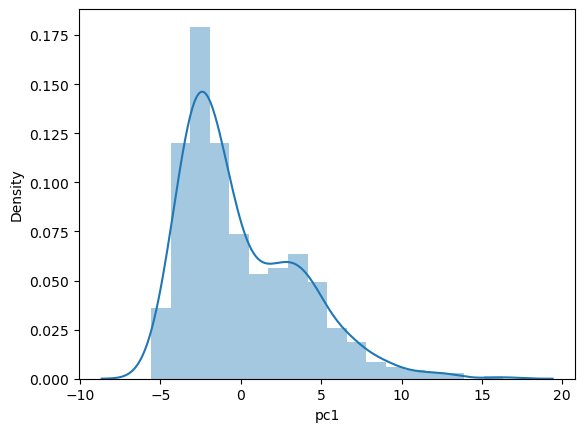

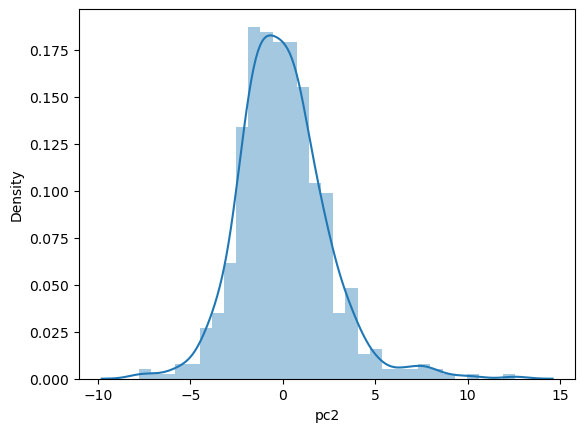

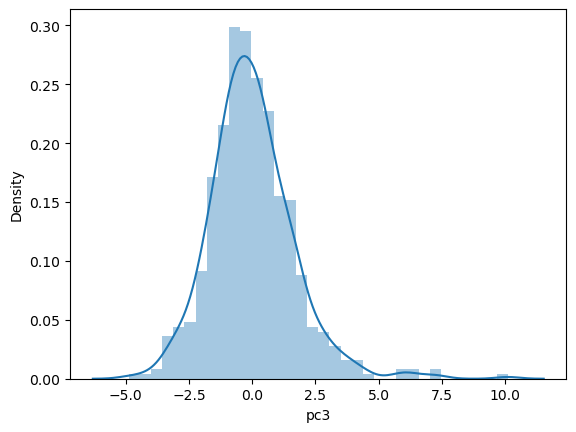

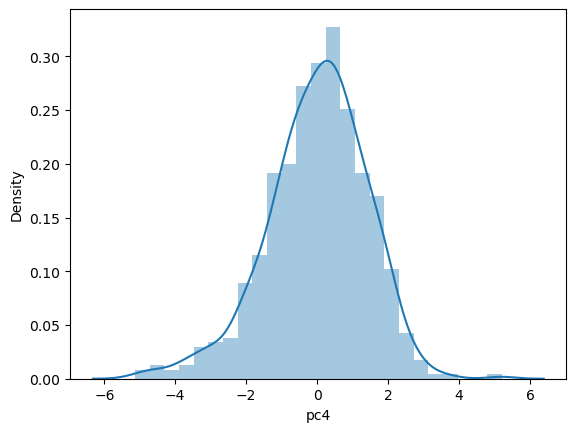

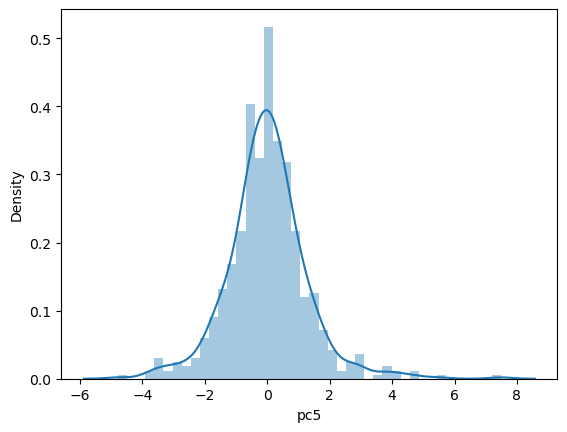

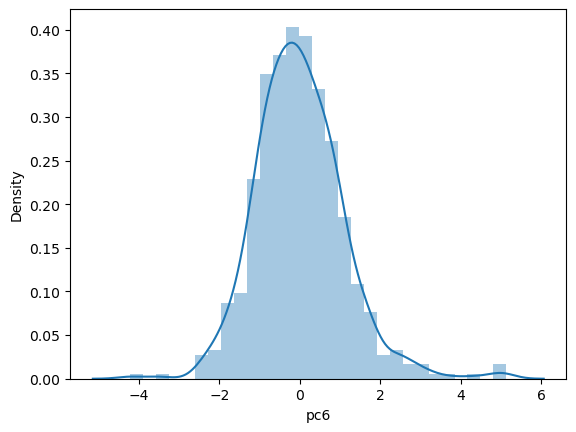

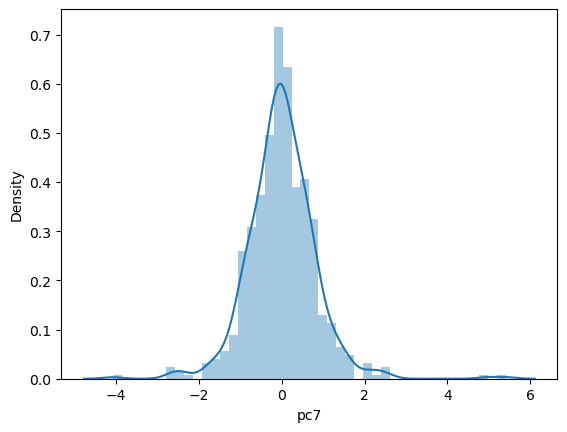

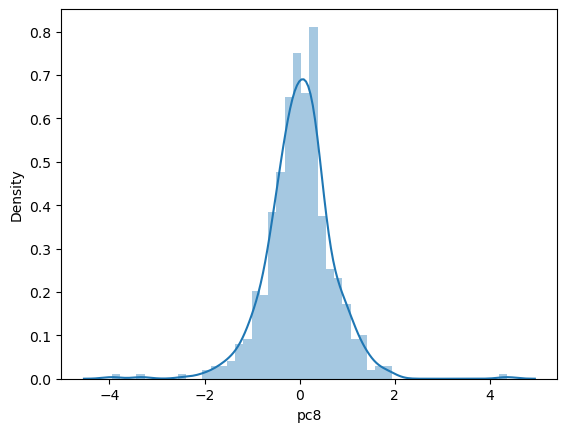

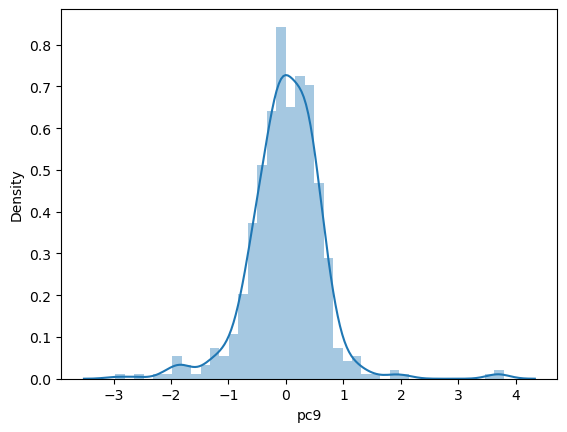

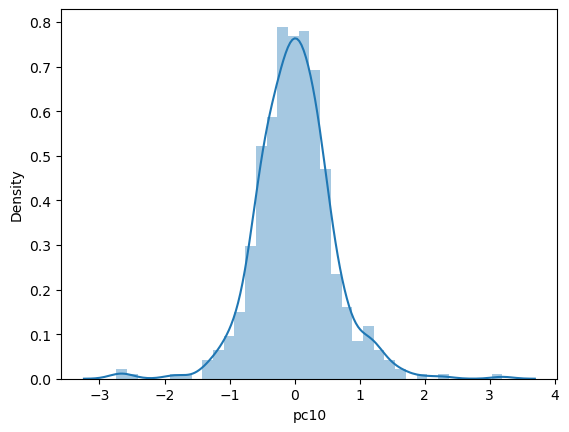

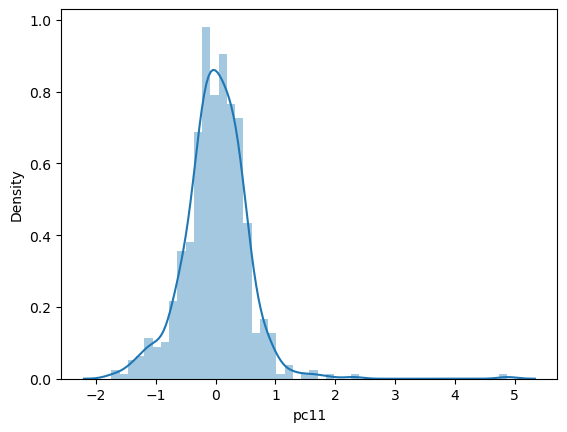

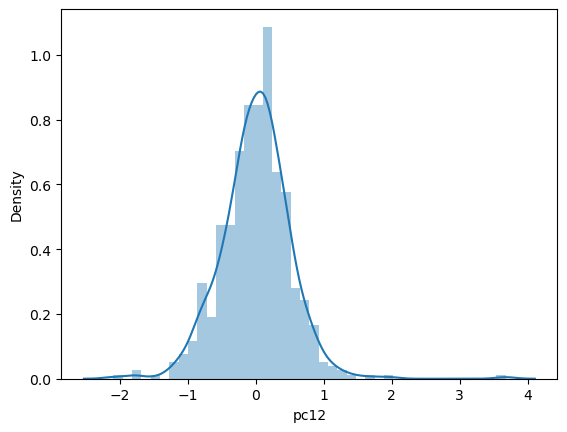

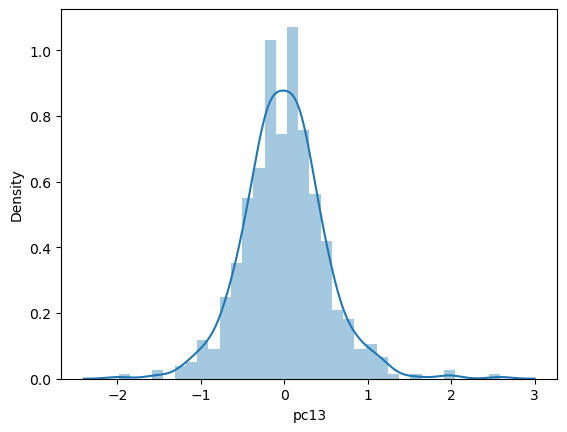

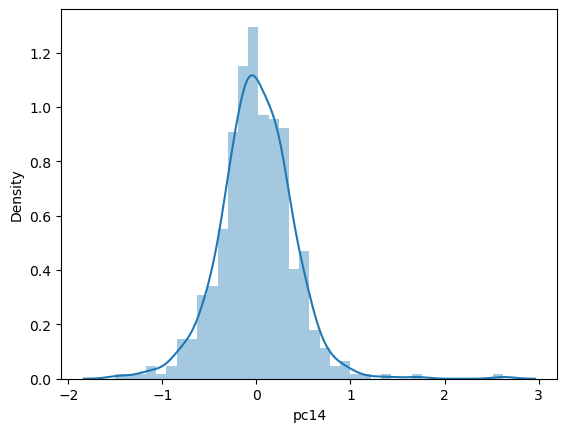

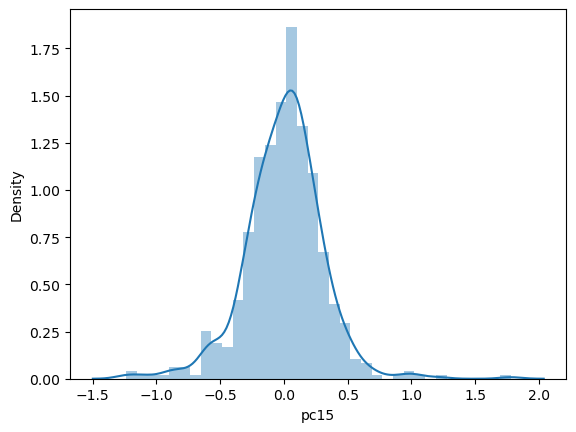

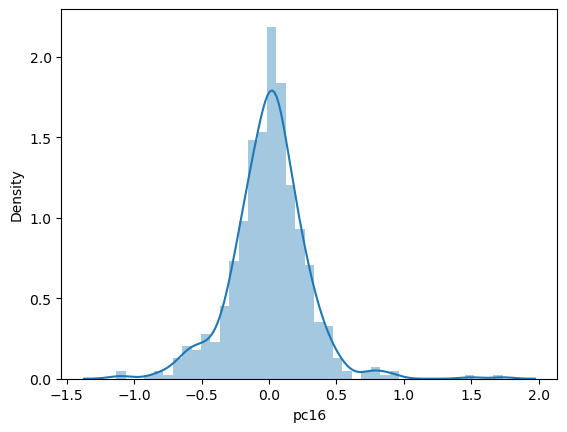

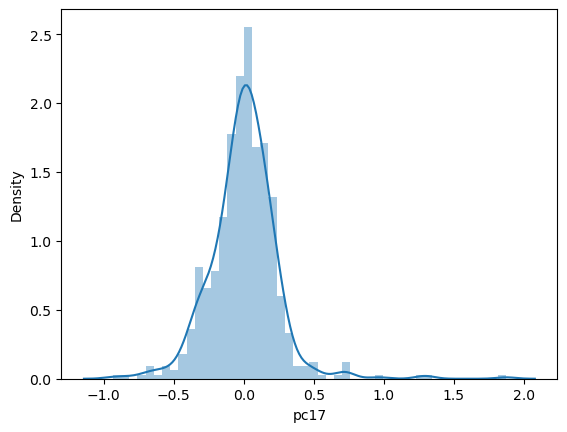

In [26]:
for i in df_pca.columns:
    sns.distplot(df_pca[i])
    plt.show()

# K- means

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
from sklearn.cluster import KMeans

In [49]:
for i in range(2,10):
    km = KMeans(n_clusters=i , random_state=10)
    k_pred = km.fit_predict(df_pca)#fit_predict- directly gives the lables
                               #or 1--> .fit()  2--> model.labels_ 
    score = silhouette_score(df_pca, k_pred, random_state=10)
    print("Sil score of ",i,"is",score)

Sil score of  2 is 0.35359231084030646
Sil score of  3 is 0.325508032241521
Sil score of  4 is 0.2941792533830627
Sil score of  5 is 0.16290616031938654
Sil score of  6 is 0.1481365518681449
Sil score of  7 is 0.15532309091543778
Sil score of  8 is 0.15829572158421876
Sil score of  9 is 0.146369236755725


Silhoutte score is high for 2

In [30]:
km = KMeans(n_clusters=2, random_state=10)
km.fit(df_pca)

KMeans(n_clusters=2, random_state=10)

In [31]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [32]:
df_pca["Kmeans"] = km.labels_
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,Kmeans
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039177,-0.089484,1
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203305,-0.071749,-0.027054,-0.407409,1
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129666,0.242985,0.334135,1
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,-0.971457,-0.910703,-0.218713,0.666275,0.102275,0.101466,0.205304,1
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005467,-0.064908,-0.222226,-0.128244,1


# AgglomerativeClustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
for i in range(2,10):
    agg = AgglomerativeClustering(n_clusters=i)
    agg_pred = agg.fit_predict(df_pca)
    score = silhouette_score(df_pca, agg_pred, random_state=10)
    print("Sil score of ",i,"is",score)

Sil score of  2 is 0.34058931324475855
Sil score of  3 is 0.3303378881989223
Sil score of  4 is 0.29434968603093514
Sil score of  5 is 0.2908745275836537
Sil score of  6 is 0.1355160903609438
Sil score of  7 is 0.11040193834790007
Sil score of  8 is 0.11417362687482119
Sil score of  9 is 0.11359653784959242


   Sil score is high for 2

In [35]:
agg = AgglomerativeClustering(n_clusters=2) #no random state parameter in agglomerative
agg.fit(df_pca)
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [36]:
df_pca['Agg'] = agg.labels_
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,Kmeans,Agg
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039177,-0.089484,1,1
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203305,-0.071749,-0.027054,-0.407409,1,1
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129666,0.242985,0.334135,1,1
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,-0.971457,-0.910703,-0.218713,0.666275,0.102275,0.101466,0.205304,1,1
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005467,-0.064908,-0.222226,-0.128244,1,1


# DB Scan

In [55]:
db = DBSCAN(eps=1.4,min_samples=4) 
db.fit(df_pca)

DBSCAN(eps=1.4, min_samples=4)

In [56]:
db.labels_

array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        2, -1, -1, -1, -1

In [57]:
df_pca['DBSCAN'] = db.labels_

In [58]:
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,Kmeans,Agg,DBSCAN
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039177,-0.089484,1,1,-1
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203305,-0.071749,-0.027054,-0.407409,1,1,-1
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129666,0.242985,0.334135,1,1,-1
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,-0.971457,-0.910703,-0.218713,0.666275,0.102275,0.101466,0.205304,1,1,-1
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005467,-0.064908,-0.222226,-0.128244,1,1,1


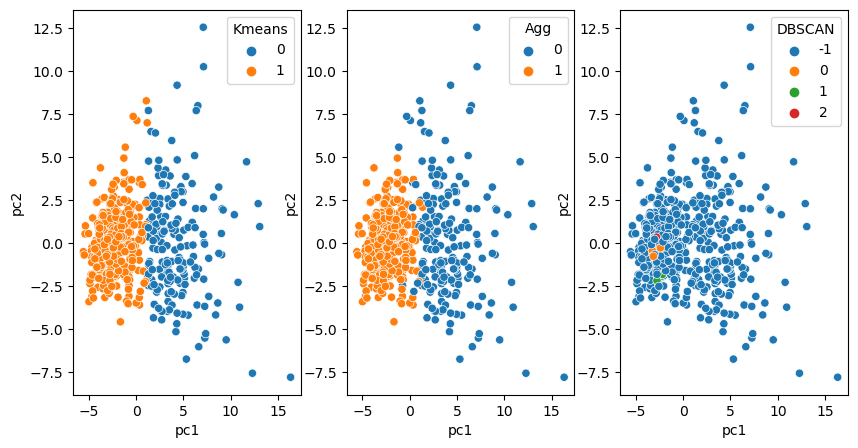

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)

sns.scatterplot(x=df_pca['pc1'],y=df_pca['pc2'],hue=df_pca['Kmeans'],palette="tab10")

plt.subplot(1,3,2)

sns.scatterplot(x=df_pca['pc1'],y=df_pca['pc2'],hue=df_pca['Agg'],palette="tab10")

plt.subplot(1,3,3)

sns.scatterplot(x=df_pca['pc1'],y=df_pca['pc2'],hue=df_pca['DBSCAN'],palette="tab10")
plt.show()

In [42]:
df_pca.Kmeans.value_counts(normalize=True)

1    0.667838
0    0.332162
Name: Kmeans, dtype: float64

In [43]:
df_pca.Agg.value_counts(normalize=True)

1    0.643234
0    0.356766
Name: Agg, dtype: float64

In [44]:
df_pca.DBSCAN.value_counts(normalize=True)

-1    0.943761
 0    0.038664
 1    0.010545
 2    0.007030
Name: DBSCAN, dtype: float64

       -------------------------------------------- USL END ---------------------------------------------------------

# SLC

In [45]:
df1 = df_pca.drop(['Agg','DBSCAN'],axis=1)
df1.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,Kmeans
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039177,-0.089484,1
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203305,-0.071749,-0.027054,-0.407409,1
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129666,0.242985,0.334135,1
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,-0.971457,-0.910703,-0.218713,0.666275,0.102275,0.101466,0.205304,1
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005467,-0.064908,-0.222226,-0.128244,1


In [46]:
x = df1.drop('Kmeans',axis=1)
y = df1['Kmeans']

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(398, 17)
(171, 17)
(398,)
(171,)


In [61]:
# ALL MODELS IN ONE CODE:
model = {"Logistic_regression" : LogisticRegression(),
         "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "AdaboostClassifier": AdaBoostClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "XGBoostClassifier": XGBClassifier()}

model_report = pd.DataFrame(columns = ["model","accuracy","precision","recall","f1score"])

for model,model_name in zip(model.values(),model.keys()):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    t = {"model" : model_name,
        "accuracy" : accuracy_score(ytest,ypred),
        "precision" : precision_score(ytest,ypred),
        "recall" : recall_score(ytest,ypred),
        "f1score":f1_score(ytest,ypred)}
    model_report = model_report.append(t,ignore_index=True)
model_report

,model,accuracy,precision,recall,f1score
0,Logistic_regression,0.988304,1.0,0.982906,0.991379
1,DecisionTreeClassifier,0.994152,1.0,0.991453,0.995708
2,RandomForestClassifier,0.994152,1.0,0.991453,0.995708
3,AdaboostClassifier,0.994152,1.0,0.991453,0.995708
4,GradientBoostingClassifier,0.994152,1.0,0.991453,0.995708
5,XGBoostClassifier,0.994152,1.0,0.991453,0.995708
